In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

In [2]:
from sklearn.base import BaseEstimator

class KMeans(BaseEstimator):
    def __init__(self, n_clusters, max_iter=100, random_seed=None, verbose=False):
        self.n_clusters = n_clusters
        self.max_iter = max_iter 
        self.random_state = np.random.RandomState(random_seed)
        self.verbose = verbose
        
    def fit(self, X):
        # Randomly select the initial centroids from the given points (with no replacement)
        idx = self.random_state.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[idx]
        if self.verbose: print('Centroids:', self.centroids)
            
        # Allocate a distances matrix between the data points and the centroids
        distances = np.zeros((len(X), self.n_clusters))
        prev_labels = None
            
        # Run the algorithm until convergence or max_iter has been reached
        for iteration in range(self.max_iter):        
            if self.verbose: print('\nIteration', iteration)
                            
            # Compute the distances to the cluster centroids
            for i in range(self.n_clusters):
                distances[:, i] = np.sum((X - self.centroids[i])**2, axis=1)
                
            # Assign each data point to the cluster with the nearest centroids
            self.labels = np.argmin(distances, axis=1) 
            if self.verbose: print('Labels:', self.labels)
            
            # Check if there was no change in the cluster assignments
            if np.all(self.labels == prev_labels):
                break
            prev_labels = self.labels
                
            # Recompute the centroids
            for i in range(self.n_clusters):
                self.centroids[i] = np.mean(X[self.labels == i], axis=0)
                
                # Handle empty clusters
                if np.isnan(self.centroids[i]).any():
                    self.centroids[i] = X[self.random_state.choice(len(X))]      
                                
            if self.verbose: print('Centroids:', self.centroids)

In [3]:
X = np.array([[0, 1], [1, 4], [1, 9], [2, 2], [2, 7], [3, 8], [4, 7], [5, 3], [6, 4], [7, 3]], dtype=float)

In [4]:
kmeans = KMeans(n_clusters=3, random_seed=0, verbose=True)
kmeans.fit(X)

Centroids: [[1. 9.]
 [6. 4.]
 [2. 7.]]

Iteration 0
Labels: [2 2 0 1 2 2 2 1 1 1]
Centroids: [[1.  9. ]
 [5.  3. ]
 [2.  5.4]]

Iteration 1
Labels: [2 2 0 1 2 0 2 1 1 1]
Centroids: [[2.   8.5 ]
 [5.   3.  ]
 [1.75 4.75]]

Iteration 2
Labels: [2 2 0 2 0 0 0 1 1 1]
Centroids: [[2.5        7.75      ]
 [6.         3.33333333]
 [1.         2.33333333]]

Iteration 3
Labels: [2 2 0 2 0 0 0 1 1 1]


In [5]:
# bad random seed 3
# (array([2, 2, 1, 2, 1, 0, 0, 2, 2, 2], dtype=int64),
#  array([[3.5       , 7.5       ],
#         [1.5       , 8.        ],
#         [3.5       , 2.83333333]]))

# bad random seed 5
# (array([0, 1, 2, 0, 1, 1, 1, 0, 0, 0], dtype=int64),
#  array([[4. , 2.6],
#         [2.5, 6.5],
#         [1. , 9. ]]))

Test on the blobs data

In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=5, random_state=10)

In [7]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [8]:
def plot_data(X):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

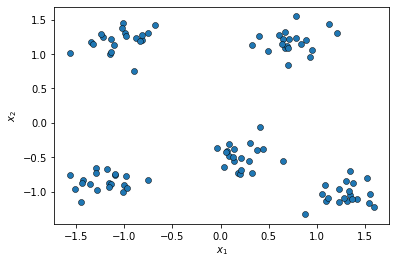

In [9]:
plot_data(X)
plt.savefig('figures/blobs_data.pdf')

In [10]:
kmeans = KMeans(n_clusters=5, random_seed=1)  
kmeans.fit(X)

In [11]:
def plot_clusters(X, labels, centroids):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', edgecolor='k', legend=False)
    sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='x', color='k', s=100, legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

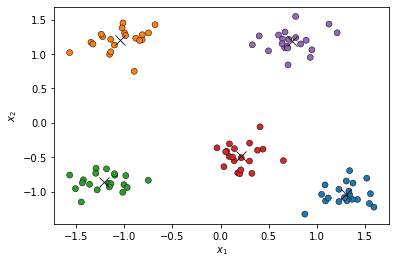

In [12]:
plot_clusters(X, kmeans.labels, kmeans.centroids)
plt.savefig('figures/blobs_kmeans.pdf')

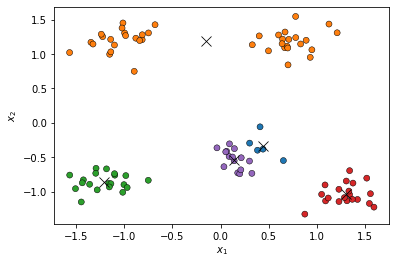

In [13]:
# Bad clustering
kmeans = KMeans(n_clusters=5, random_seed=0)  
kmeans.fit(X)

plot_clusters(X, kmeans.labels, kmeans.centroids)
plt.savefig('figures/blobs_kmeans_bad_seed.pdf')